In [1]:
from langgraph.graph import StateGraph

In [2]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()
model = ChatOpenAI()
llm =  ChatOllama(model="llama3.2", temperature=0.2)

In [1]:
import base64
import json
import os
from dataclasses import dataclass
from typing import TypedDict, List, Optional

import requests
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama

# -----------------------------
# CONFIG
# -----------------------------
OLLAMA_HOST = "http://localhost:11434"
VISION_MODEL = "llama3.2-vision"  # pulled via: ollama pull llama3.2-vision

# Image generator service (example: OllamaDiffuser)
# It exposes an API like: POST http://localhost:8000/api/generate --output image.png  (per docs)
IMAGE_API = "http://localhost:8000/api/generate"
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [6]:

import os, time, json
import requests

from typing import TypedDict, List, Literal
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama

from IPython.display import display, Markdown, Image
from pprint import pprint

from dotenv import load_dotenv
load_dotenv()

from huggingface_hub import InferenceClient

# ---- Hugging Face token (set it in env as HF_TOKEN) ----
HF_TOKEN = os.getenv("HUGGINGFACEHUB_API_TOKEN")

test_model = "stabilityai/stable-diffusion-xl-base-1.0"
url = f"https://api-inference.huggingface.co/models/{test_model}"
hdr = {"Authorization": f"Bearer {HF_TOKEN}"}

r = requests.post(url, headers=hdr, json={"inputs": "a sunrise over snowy mountains"}, timeout=120)
print("status:", r.status_code, "content-type:", r.headers.get("content-type"))


status: 410 content-type: application/json; charset=utf-8


c:\Users\harsh.raj\OneDrive - Aster DM Healthcare\Codes\LangGraph\Practical LangGraph\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\harsh.raj\OneDrive - Aster DM Healthcare\Codes\LangGraph\Practical LangGraph\myenv\Lib\site-packages\torch\amp\autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Keyword arguments {'dtype': torch.bfloat16} are not expected by StableDiffusionXLPipeline and will be ignored.
100%|██████████| 50/50 [2:02:51<00:00, 147.43s/it]  


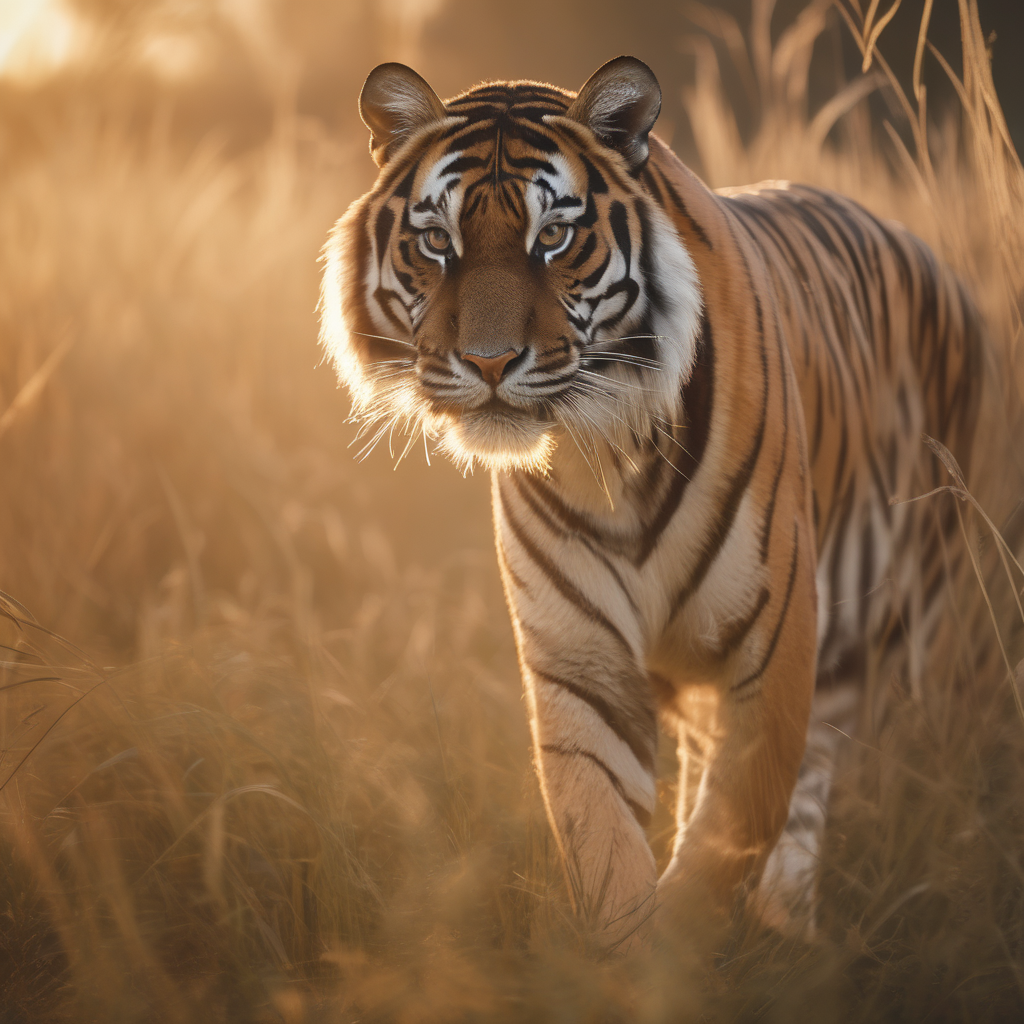

In [1]:
import torch
from diffusers import DiffusionPipeline

# switch to "mps" for apple devices
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", dtype=torch.bfloat16, device_map="cpu")

prompt = "Bengal tiger walking through tall grass at sunrise, golden light, shallow depth, detailed, 8k"
image = pipe(prompt).images[0]

from IPython.display import display
display(image)

In [7]:
!pip install -U Numpy

In [1]:
!pip install -U torch

  Using cached torch-2.9.1-cp312-cp312-win_amd64.whl.metadata (30 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached markupsafe-3.0.3-cp312-cp312-win_amd64.whl.metadata (2.8 kB)
Using cached torch-2.9.1-cp312-cp312-win_amd64.whl (110.9 MB)
Using cached networkx-3.6.1-py3-none-any.whl (2.1 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp312-cp312-win_amd64.whl (15 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)

   ---------------------------------------- 0/7 [mpmath]
   ---------------------------------------- 0/7 [mpmath]
   ----------------------

In [3]:
!pip install -U diffusers transformers accelerate

  Using cached diffusers-0.36.0-py3-none-any.whl.metadata (20 kB)
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached accelerate-1.12.0-py3-none-any.whl.metadata (19 kB)
  Using cached safetensors-0.7.0-cp38-abi3-win_amd64.whl.metadata (4.2 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
Using cached diffusers-0.36.0-py3-none-any.whl (4.6 MB)
Using cached transformers-4.57.3-py3-none-any.whl (12.0 MB)
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl (2.7 MB)
Using cached accelerate-1.12.0-py3-none-any.whl (380 kB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    -